# Sentiment Analysis Aplikasi Al-Qur'an Google Play Store

### Scraping Data

In [1]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [2]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.andi.alquran.id',
    lang='id',  
    country='id', 
    sort=Sort.MOST_RELEVANT, 
    count=1000, 
    filter_score_with=None 
)

In [3]:
df = pd.DataFrame(np.array(result),columns=['review'])

df = df.join(pd.DataFrame(df.pop('review').tolist()))

df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,dcfe77d8-03c2-4135-87e1-f7115fa1d2ed,Lik Widodo,https://play-lh.googleusercontent.com/a/ACg8oc...,"saya pakai hp dua, keduanya sy isi alquran ini...",5,788,2.7.97,2024-06-24 06:45:34,"Alhamdulillah, syukron katsiron Pak Widodo sud...",2019-03-22 16:23:17,2.7.97
1,f3ec6f3a-45a2-4214-99bd-f16b100dfeea,Hudan NafieX,https://play-lh.googleusercontent.com/a-/ALV-U...,Ada saran dari saya coba sedikan option tombol...,5,1386,2.7.93,2024-05-11 19:51:30,None,NaT,2.7.93
2,2d0d92cb-0a95-41d6-8b91-de988a271fcc,Dimas Bagus,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sudah bagus. Dengan terjemahan akurat, huruf h...",4,123,2.7.97,2024-06-15 16:27:48,"Assalamu'alaikum, Dimas Bagus.\nTerima kasih m...",2024-06-15 20:55:20,2.7.97
3,2e9ec233-3cb0-499d-9a44-59b4db67faa5,agus setiawan,https://play-lh.googleusercontent.com/a-/ALV-U...,"Assalamualikum, Aplikasinya sudah bagus, cuman...",5,1610,2.7.97,2024-05-29 19:50:14,"Assalamu'alaikum, Agus Setiawan.\nTerima kasih...",2024-05-30 11:28:47,2.7.97
4,060903bb-5fb6-42ae-816e-3013a5a1232e,Zeppty Moza,https://play-lh.googleusercontent.com/a-/ALV-U...,"Terlalu sering update, padahal tampilan tidak ...",5,1102,2.7.96,2024-05-16 06:12:33,"Assalamu'alaikum, Zeppty Moza.\nTerima kasih m...",2024-05-16 10:57:40,2.7.96


### Get Dataset

In [4]:
df.shape

(1000, 11)

In [5]:
df[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Lik Widodo,5,2024-06-24 06:45:34,"saya pakai hp dua, keduanya sy isi alquran ini..."
1,Hudan NafieX,5,2024-05-11 19:51:30,Ada saran dari saya coba sedikan option tombol...
2,Dimas Bagus,4,2024-06-15 16:27:48,"Sudah bagus. Dengan terjemahan akurat, huruf h..."
3,agus setiawan,5,2024-05-29 19:50:14,"Assalamualikum, Aplikasinya sudah bagus, cuman..."
4,Zeppty Moza,5,2024-05-16 06:12:33,"Terlalu sering update, padahal tampilan tidak ..."


In [6]:
new_df = df[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
488,Emal Maulana yosep,5,2024-07-19 20:54:25,"Alhamdulillah sangat bagus tulisan dan tajwid,..."
185,Mirza Bkl,5,2024-07-19 19:51:52,dengan adanya app ini membuat saya dgn mudah m...
391,Ahmad Zhr,5,2024-07-19 19:18:14,"Dengan adanya aplikasi Al Qur'an Indonesia, ak..."
191,ismail zam-zam,5,2024-07-19 18:59:39,sangat mudah digunakan dan membantu belajar ta...
177,muhammad Husni,5,2024-07-19 18:32:32,dgn apk ini saya bisa lebih enak untuk baca al...


In [7]:
df_sentimen = sorted_df[['userName', 'score','at', 'content']] 

In [8]:
df_sentimen=df_sentimen[['content', 'score']]

In [9]:
df_sentimen.to_csv('sentimen_scraping.csv', index=False)

### Labeling Target

In [9]:
df_sentimen['score'].unique()

array([5, 3, 1, 4, 2])

Kriteria Sentimen :

- Score > 3 = 1
- Score = 3 = 0
- Score <= 2 -1

In [10]:
df_sentimen.head(20)

,content,score
488,"Alhamdulillah sangat bagus tulisan dan tajwid,...",5
185,dengan adanya app ini membuat saya dgn mudah m...,5
391,"Dengan adanya aplikasi Al Qur'an Indonesia, ak...",5
191,sangat mudah digunakan dan membantu belajar ta...,5
177,dgn apk ini saya bisa lebih enak untuk baca al...,5
287,"alhamdulillah, membuat baca Al Qur'an bisa kap...",5
550,utamakan perbaikan dalam sistem kadang2 bunyi ...,3
398,"apk ini sngat membantu, sehingga dimnapun kta ...",5
520,oke .. sesuai.. cocok tingkatkan lagi pelayana...,5
293,alhamdulillah dengan aplikasi ini jadi bisa me...,5


In [11]:
def label(score):
  if score > 3:
    return 1
  elif score == 3 :
    return 0
  elif score <= 2 :
    return -1
df_sentimen['Label'] = df_sentimen ['score'].apply(label)
df_sentimen.head(20)

,content,score,Label
488,"Alhamdulillah sangat bagus tulisan dan tajwid,...",5,1
185,dengan adanya app ini membuat saya dgn mudah m...,5,1
391,"Dengan adanya aplikasi Al Qur'an Indonesia, ak...",5,1
191,sangat mudah digunakan dan membantu belajar ta...,5,1
177,dgn apk ini saya bisa lebih enak untuk baca al...,5,1
287,"alhamdulillah, membuat baca Al Qur'an bisa kap...",5,1
550,utamakan perbaikan dalam sistem kadang2 bunyi ...,3,0
398,"apk ini sngat membantu, sehingga dimnapun kta ...",5,1
520,oke .. sesuai.. cocok tingkatkan lagi pelayana...,5,1
293,alhamdulillah dengan aplikasi ini jadi bisa me...,5,1


### Check Missing Value

In [12]:
df_sentimen.isna().sum()

content    0
score      0
Label      0
dtype: int64

### Pre Processing

#### Case Folding

In [13]:
import re
df_sentimen['textCaseFolding'] = df_sentimen['content'].str.lower()  

In [14]:
pd.set_option('display.max_colwidth', None) 
df_sentimen.head()

,content,score,Label,textCaseFolding
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran."
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya


In [15]:
import warnings
warnings.filterwarnings("ignore")  
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords


stop = stopwords.words('indonesian')
df_sentimen['textStopWord'] = df_sentimen['textCaseFolding'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df_sentimen.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muhaiminnur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,textCaseFolding,textStopWord
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas","alhamdulillah bagus tulisan tajwid, terjemahan"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini🙏
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran."
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat","mudah membantu belajar tajwid, hafalan, shalat akurat"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya
287,"alhamdulillah, membuat baca Al Qur'an bisa kapan saja. Lebih fleksibel dan memudahkan beribadah",5,1,"alhamdulillah, membuat baca al qur'an bisa kapan saja. lebih fleksibel dan memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah"
550,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk Alquran is the best 👍,3,0,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍,utamakan perbaikan sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍
398,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio Al Qur'an..",5,1,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio al qur'an..","apk sngat membantu, dimnapun kta brada membaca mendengar audio al qur'an.."
520,oke .. sesuai.. cocok tingkatkan lagi pelayananan dan informasi lainnya,5,1,oke .. sesuai.. cocok tingkatkan lagi pelayananan dan informasi lainnya,oke .. sesuai.. cocok tingkatkan pelayananan informasi
293,alhamdulillah dengan aplikasi ini jadi bisa membaca alquran di manapun berada... dan aplikasi sangat mudah dipahami... barakallah u fiik,5,1,alhamdulillah dengan aplikasi ini jadi bisa membaca alquran di manapun berada... dan aplikasi sangat mudah dipahami... barakallah u fiik,alhamdulillah aplikasi membaca alquran manapun berada... aplikasi mudah dipahami... barakallah u fiik


In [16]:
import string 

# Fungsi untuk menghapus karakter spesial dari tweet
def remove_tweet_special(text):
    # Menghapus tab, new line, dan backslash
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # Menghapus karakter non ASCII (emotikon, huruf Cina, dll.)
    text = text.encode('ascii', 'replace').decode('ascii')
    # Menghapus mention, link, dan hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")

def remove_emoticons(text):  
    emoticon_pattern = r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FB00-\U0001FBFF]+'  
    return re.sub(emoticon_pattern, '', text)  
                
df_sentimen['textClean'] = df_sentimen['content'].apply(remove_tweet_special)

# Fungsi untuk menghapus angka
def remove_number(text):
    return re.sub(r"\d+", "", text)

df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_number)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_punctuation)

# Fungsi untuk menghapus spasi di awal dan akhir
def remove_whitespace_LT(text):
    return text.strip()

df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_whitespace_LT)

# Fungsi untuk mengubah spasi ganda menjadi spasi tunggal
def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_whitespace_multiple)

# Fungsi untuk menghapus karakter tunggal
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_singl_char)
df_sentimen['textClean'] = df_sentimen['textStopWord'].apply(remove_emoticons)  

In [17]:
df_sentimen.head(20)

,content,score,Label,textCaseFolding,textStopWord,textClean
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas","alhamdulillah bagus tulisan tajwid, terjemahan","alhamdulillah bagus tulisan tajwid, terjemahan"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran."
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","mudah membantu belajar tajwid, hafalan, shalat akurat"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya
287,"alhamdulillah, membuat baca Al Qur'an bisa kapan saja. Lebih fleksibel dan memudahkan beribadah",5,1,"alhamdulillah, membuat baca al qur'an bisa kapan saja. lebih fleksibel dan memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah"
550,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk Alquran is the best 👍,3,0,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍,utamakan perbaikan sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍,utamakan perbaikan sistem kadang2 bunyi kadang tdk tuk alquran is the best
398,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio Al Qur'an..",5,1,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio al qur'an..","apk sngat membantu, dimnapun kta brada membaca mendengar audio al qur'an..","apk sngat membantu, dimnapun kta brada membaca mendengar audio al qur'an.."
520,oke .. sesuai.. cocok tingkatkan lagi pelayananan dan informasi lainnya,5,1,oke .. sesuai.. cocok tingkatkan lagi pelayananan dan informasi lainnya,oke .. sesuai.. cocok tingkatkan pelayananan informasi,oke .. sesuai.. cocok tingkatkan pelayananan informasi
293,alhamdulillah dengan aplikasi ini jadi bisa membaca alquran di manapun berada... dan aplikasi sangat mudah dipahami... barakallah u fiik,5,1,alhamdulillah dengan aplikasi ini jadi bisa membaca alquran di manapun berada... dan aplikasi sangat mudah dipahami... barakallah u fiik,alhamdulillah aplikasi membaca alquran manapun berada... aplikasi mudah dipahami... barakallah u fiik,alhamdulillah aplikasi membaca alquran manapun berada... aplikasi mudah dipahami... barakallah u fiik


In [18]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
df_sentimen['textTokens'] = df_sentimen['textClean'].apply(lambda x: word_tokenize(x))
df_sentimen.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muhaiminnur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,textCaseFolding,textStopWord,textClean,textTokens
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas","alhamdulillah bagus tulisan tajwid, terjemahan","alhamdulillah bagus tulisan tajwid, terjemahan","[alhamdulillah, bagus, tulisan, tajwid, ,, terjemahan]"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini,"[app, dgn, mudah, membaca, saja, ...., pokok, nya, manfaat, semoga, jariah, pencipta, aplikasi, ini]"
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","[aplikasi, al, qur'an, indonesia, ,, sungguh, terbantu, ,, membaca, ayat, ayat, suci, al-quran, .]"
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","[mudah, membantu, belajar, tajwid, ,, hafalan, ,, shalat, akurat]"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,"[dgn, apk, enak, baca, al, qur'an, baca, penjelasan, tajwid, nya]"


In [19]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

#Inisialisasi Kamus Kosakata yang Dinormalisasi
normalizad_word_dict = {}

#Pengisian Kamus dengan Data dari DataFrame
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

#Fungsi untuk Menormalisasi Dokumen
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

#Aplikasi Fungsi Normalisasi ke Kolom DataFrame
df_sentimen['teksNormalized'] = df_sentimen['textTokens'].apply(normalized_term)

df_sentimen.head(10)

,content,score,Label,textCaseFolding,textStopWord,textClean,textTokens,teksNormalized
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas","alhamdulillah bagus tulisan tajwid, terjemahan","alhamdulillah bagus tulisan tajwid, terjemahan","[alhamdulillah, bagus, tulisan, tajwid, ,, terjemahan]","[alhamdulillah, bagus, tulisan, tajwid, ,, terjemahan]"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini,"[app, dgn, mudah, membaca, saja, ...., pokok, nya, manfaat, semoga, jariah, pencipta, aplikasi, ini]","[aplikasi, dengan, mudah, membaca, saja, ...., pokok, nya, manfaat, semoga, jariah, pencipta, aplikasi, ini]"
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","[aplikasi, al, qur'an, indonesia, ,, sungguh, terbantu, ,, membaca, ayat, ayat, suci, al-quran, .]","[aplikasi, al, qur'an, indonesia, ,, sungguh, terbantu, ,, membaca, ayat, ayat, suci, al-quran, .]"
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","[mudah, membantu, belajar, tajwid, ,, hafalan, ,, shalat, akurat]","[mudah, membantu, belajar, tajwid, ,, hafalan, ,, shalat, akurat]"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,"[dgn, apk, enak, baca, al, qur'an, baca, penjelasan, tajwid, nya]","[ dengan, aplikasi, enak, baca, al, qur'an, baca, penjelasan, tajwid, nya]"
287,"alhamdulillah, membuat baca Al Qur'an bisa kapan saja. Lebih fleksibel dan memudahkan beribadah",5,1,"alhamdulillah, membuat baca al qur'an bisa kapan saja. lebih fleksibel dan memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah","[alhamdulillah, ,, baca, al, qur'an, saja, ., fleksibel, memudahkan, beribadah]","[alhamdulillah, ,, baca, al, qur'an, saja, ., fleksibel, memudahkan, beribadah]"
550,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk Alquran is the best 👍,3,0,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍,utamakan perbaikan sistem kadang2 bunyi kadang tdk tuk alquran is the best 👍,utamakan perbaikan sistem kadang2 bunyi kadang tdk tuk alquran is the best,"[utamakan, perbaikan, sistem, kadang2, bunyi, kadang, tdk, tuk, alquran, is, the, best]","[utamakan, perbaikan, sistem, kadang2, bunyi, kadang, tidak, tuk, alquran, is, the, terbaik]"
398,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio Al Qur'an..",5,1,"apk ini sngat membantu, sehingga dimnapun kta brada bisa membaca ataupun mendengar kan audio al qur'an..","

In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    if isinstance(term, str):
        return stemmer.stem(term)
    return str(term) 

term_dict = {}
hitung = 0

for document in df_sentimen['teksNormalized']:
    if isinstance(document, str):
        for term in document.split():
            if term not in term_dict:
                term_dict[term] = ' '
    else:
        continue

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    if isinstance(document, str):
        return [term_dict.get(term, term) for term in document.split()]
    return [str(document)] 

df_sentimen['textSteam'] = df_sentimen['teksNormalized'].apply(lambda x: ' '.join(get_stemmed_term(x)))
df_sentimen.head(20)

0
------------------------
{}
------------------------


,content,score,Label,textCaseFolding,textStopWord,textClean,textTokens,teksNormalized,textSteam
488,"Alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas",5,1,"alhamdulillah sangat bagus tulisan dan tajwid, terjemahan sangat jelas","alhamdulillah bagus tulisan tajwid, terjemahan","alhamdulillah bagus tulisan tajwid, terjemahan","[alhamdulillah, bagus, tulisan, tajwid, ,, terjemahan]","[alhamdulillah, bagus, tulisan, tajwid, ,, terjemahan]","['alhamdulillah', 'bagus', 'tulisan', 'tajwid', ',', 'terjemahan']"
185,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,5,1,dengan adanya app ini membuat saya dgn mudah membaca di mana saja kapan saja....pokok nya memberi manfaat dan semoga menjadi jariah buat pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini🙏,app dgn mudah membaca saja....pokok nya manfaat semoga jariah pencipta aplikasi ini,"[app, dgn, mudah, membaca, saja, ...., pokok, nya, manfaat, semoga, jariah, pencipta, aplikasi, ini]","[aplikasi, dengan, mudah, membaca, saja, ...., pokok, nya, manfaat, semoga, jariah, pencipta, aplikasi, ini]","['aplikasi', ' dengan', 'mudah', 'membaca', 'saja', '....', 'pokok', 'nya', 'manfaat', 'semoga', 'jariah', 'pencipta', 'aplikasi', 'ini']"
391,"Dengan adanya aplikasi Al Qur'an Indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci Al-Quran.",5,1,"dengan adanya aplikasi al qur'an indonesia, aku sungguh sangat terbantu, untuk membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","aplikasi al qur'an indonesia, sungguh terbantu, membaca ayat ayat suci al-quran.","[aplikasi, al, qur'an, indonesia, ,, sungguh, terbantu, ,, membaca, ayat, ayat, suci, al-quran, .]","[aplikasi, al, qur'an, indonesia, ,, sungguh, terbantu, ,, membaca, ayat, ayat, suci, al-quran, .]","['aplikasi', 'al', ""qur'an"", 'indonesia', ',', 'sungguh', 'terbantu', ',', 'membaca', 'ayat', 'ayat', 'suci', 'al-quran', '.']"
191,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat",5,1,"sangat mudah digunakan dan membantu belajar tajwid, untuk hafalan, melihat waktu shalat yang akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","mudah membantu belajar tajwid, hafalan, shalat akurat","[mudah, membantu, belajar, tajwid, ,, hafalan, ,, shalat, akurat]","[mudah, membantu, belajar, tajwid, ,, hafalan, ,, shalat, akurat]","['mudah', 'membantu', 'belajar', 'tajwid', ',', 'hafalan', ',', 'shalat', 'akurat']"
177,dgn apk ini saya bisa lebih enak untuk baca al Qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,5,1,dgn apk ini saya bisa lebih enak untuk baca al qur'an dan bisa saya baca kapan saya mau dan lebih baik di tambah penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,dgn apk enak baca al qur'an baca penjelasan tajwid nya,"[dgn, apk, enak, baca, al, qur'an, baca, penjelasan, tajwid, nya]","[ dengan, aplikasi, enak, baca, al, qur'an, baca, penjelasan, tajwid, nya]","[' dengan', ' aplikasi', 'enak', 'baca', 'al', ""qur'an"", 'baca', 'penjelasan', 'tajwid', 'nya']"
287,"alhamdulillah, membuat baca Al Qur'an bisa kapan saja. Lebih fleksibel dan memudahkan beribadah",5,1,"alhamdulillah, membuat baca al qur'an bisa kapan saja. lebih fleksibel dan memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah","alhamdulillah, baca al qur'an saja. fleksibel memudahkan beribadah","[alhamdulillah, ,, baca, al, qur'an, saja, ., fleksibel, memudahkan, beribadah]","[alhamdulillah, ,, baca, al, qur'an, saja, ., fleksibel, memudahkan, beribadah]","['alhamdulillah', ',', 'baca', 'al', ""qur'an"", 'saja', '.', 'fleksibel', 'memudahkan', 'beribadah']"
550,utamakan perbaikan dalam sistem kadang2 bunyi kadang tdk tuk Alquran is the best 👍,3,0,uta

In [24]:
df_sentimen.to_csv('hasil_TextPreProcessing-v2.csv', index= False)

In [25]:
df_clean = pd.read_csv('hasil_TextPreProcessing.csv')

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_sentimen['textSteam'], df_sentimen['Label'], 
                                                    test_size = 0.15)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(850,)
(850,)
(150,)
(150,)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [29]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [30]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [31]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
y_pred = nb.predict(tfidf_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))  
print("MultinomialNB Precision (macro):", precision_score(y_test, predicted, average="micro"))  
print("MultinomialNB Recall (macro):", recall_score(y_test, predicted, average="micro"))  
print("MultinomialNB f1_score (macro):", f1_score(y_test, predicted, average="micro"))  

print(f'Confusion Matrix:\n {confusion_matrix(y_test, predicted)}')  
print('====================================================\n')  
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.82
MultinomialNB Precision (macro): 0.82
MultinomialNB Recall (macro): 0.82
MultinomialNB f1_score (macro): 0.82
Confusion Matrix:
 [[ 11   0   7]
 [  8   0   7]
 [  5   0 112]]

              precision    recall  f1-score   support

          -1       0.46      0.61      0.52        18
           0       0.00      0.00      0.00        15
           1       0.89      0.96      0.92       117

    accuracy                           0.82       150
   macro avg       0.45      0.52      0.48       150
weighted avg       0.75      0.82      0.78       150



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.svm import SVC  # Import SVM classifier  

# Inisialisasi dan latih model SVM  
clf = SVC(kernel='linear')  # Anda bisa memilih kernel yang sesuai, misalnya 'linear', 'poly', 'rbf', dll.  
clf.fit(X_train, y_train)  
predicted = clf.predict(X_test)  

# Evaluasi performa model  
print("SVM Accuracy:", accuracy_score(y_test, predicted))  
print("SVM Precision (micro):", precision_score(y_test, predicted, average="weighted"))  
print("SVM Recall (micro):", recall_score(y_test, predicted, average="weighted"))  
print("SVM f1_score (micro):", f1_score(y_test, predicted, average="weighted"))  

# Tampilkan confusion matrix  
print(f'Confusion Matrix:\n {confusion_matrix(y_test, predicted)}')  
print('====================================================\n')  
# Tampilkan classification report  
print(classification_report(y_test, predicted, zero_division=0))

SVM Accuracy: 0.8333333333333334
SVM Precision (micro): 0.817289383711756
SVM Recall (micro): 0.8333333333333334
SVM f1_score (micro): 0.8241894339969653
Confusion Matrix:
 [[ 11   2   5]
 [  4   4   7]
 [  2   5 110]]

              precision    recall  f1-score   support

          -1       0.65      0.61      0.63        18
           0       0.36      0.27      0.31        15
           1       0.90      0.94      0.92       117

    accuracy                           0.83       150
   macro avg       0.64      0.61      0.62       150
weighted avg       0.82      0.83      0.82       150



In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)  # Anda bisa menyesuaikan parameter ini
logreg.fit(X_train, y_train)
predicted_logreg = logreg.predict(X_test)


# Evaluasi performa model Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, predicted_logreg))
print("Logistic Regression Precision (weighted):", precision_score(y_test, predicted_logreg, average="weighted"))
print("Logistic Regression Recall (weighted):", recall_score(y_test, predicted_logreg, average="weighted"))
print("Logistic Regression f1_score (weighted):", f1_score(y_test, predicted_logreg, average="weighted"))
print(f'Confusion Matrix (Logistic Regression):\n {confusion_matrix(y_test, predicted_logreg)}')
print('====================================================\n')
print("Logistic Regression Classification Report:\n", classification_report(y_test, predicted_logreg, zero_division=0))

Logistic Regression Accuracy: 0.8466666666666667
Logistic Regression Precision (weighted): 0.824
Logistic Regression Recall (weighted): 0.8466666666666667
Logistic Regression f1_score (weighted): 0.8227272727272728
Confusion Matrix (Logistic Regression):
 [[ 10   0   8]
 [  4   3   8]
 [  1   2 114]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -1       0.67      0.56      0.61        18
           0       0.60      0.20      0.30        15
           1       0.88      0.97      0.92       117

    accuracy                           0.85       150
   macro avg       0.71      0.58      0.61       150
weighted avg       0.82      0.85      0.82       150



In [43]:
from sklearn.ensemble import RandomForestClassifier


#Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100) 
rf_clf.fit(X_train, y_train)
predicted_rf = rf_clf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, predicted_rf))
print("Random Forest Precision (weighted):", precision_score(y_test, predicted_rf, average="weighted"))
print("Random Forest Recall (weighted):", recall_score(y_test, predicted_rf, average="weighted"))
print("Random Forest f1_score (weighted):", f1_score(y_test, predicted_rf, average="weighted"))
print(f'Confusion Matrix (Random Forest):\n {confusion_matrix(y_test, predicted_rf)}')
print('====================================================\n')
print("Random Forest Classification Report:\n", classification_report(y_test, predicted_rf, zero_division=0))

Random Forest Accuracy: 0.82
Random Forest Precision (weighted): 0.7220013080444735
Random Forest Recall (weighted): 0.82
Random Forest f1_score (weighted): 0.7626239224137931
Confusion Matrix (Random Forest):
 [[  6   0  12]
 [  5   0  10]
 [  0   0 117]]

Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       0.55      0.33      0.41        18
           0       0.00      0.00      0.00        15
           1       0.84      1.00      0.91       117

    accuracy                           0.82       150
   macro avg       0.46      0.44      0.44       150
weighted avg       0.72      0.82      0.76       150



### Exploratory Data Analysis (EDA)

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#### Negative Sentiment

In [64]:
negative = df_sentimen[df_sentimen["Label"] == -1]

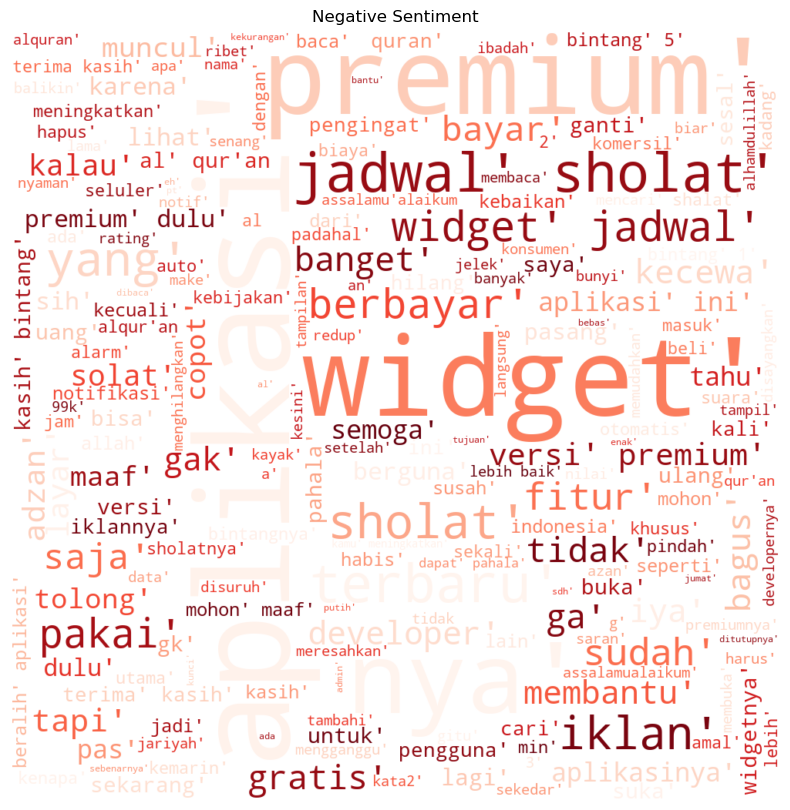

In [65]:
negative_sentiment = ' '.join(word for word in negative["textSteam"])

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(negative_sentiment)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Sentiment")
plt.show()

#### Netral Sentiment

In [54]:
netral = df_sentimen[df_sentimen["Label"] == 0]

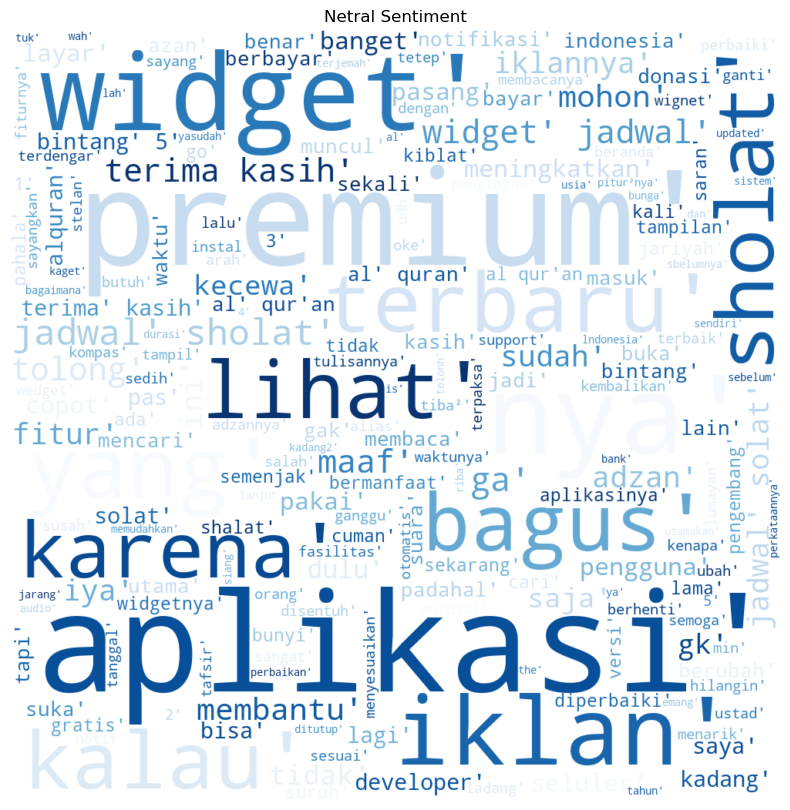

In [66]:
netral_sentiment = ' '.join(word for word in netral["textSteam"])

wordcloud = WordCloud(colormap='Blues', 
width=1000, height=1000, 
mode='RGBA', 
background_color='white').generate(netral_sentiment)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Netral Sentiment")
plt.show()

#### Positive Sentiment

In [67]:
positive = df_sentimen[df_sentimen["Label"] == 1]

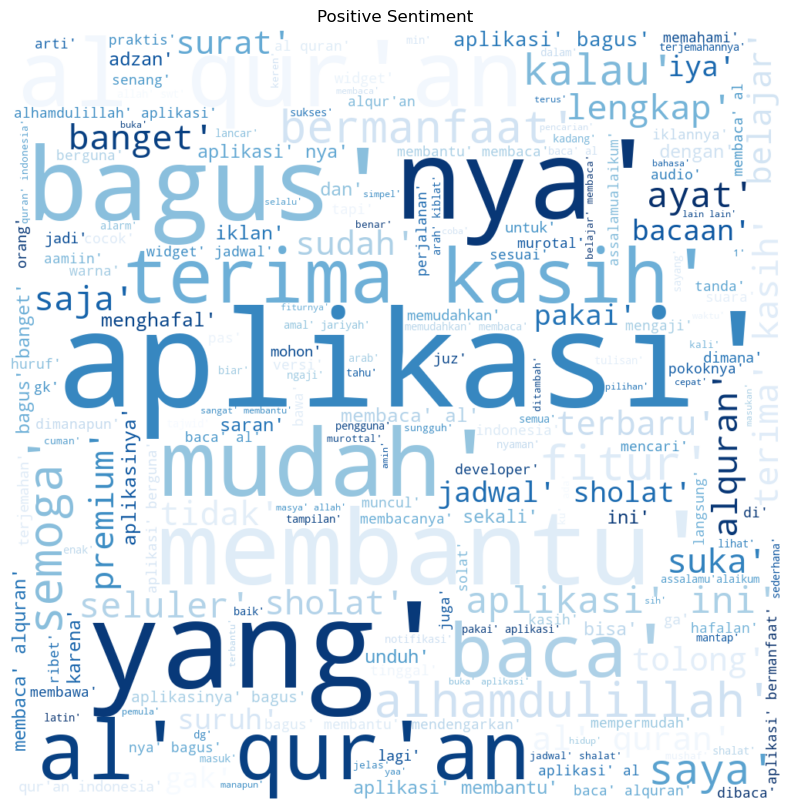

In [68]:
positive_sentiment = ' '.join(word for word in positive["textSteam"])

wordcloud = WordCloud(colormap='Blues', 
width=1000, height=1000, 
mode='RGBA', 
background_color='white').generate(positive_sentiment)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Sentiment")
plt.show()

#### Trend Sentiment 

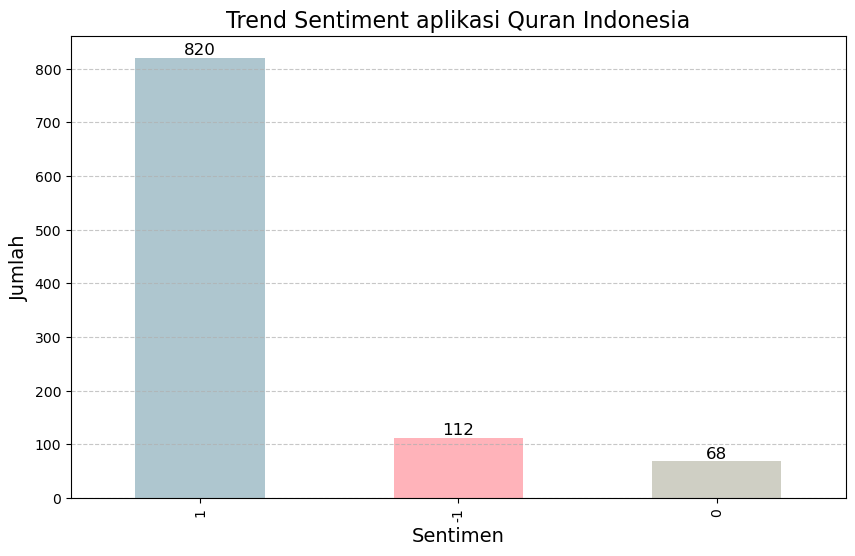

In [74]:
sentimen_data = pd.value_counts(df_sentimen["Label"], sort=True)

colors = ["#aec6cf", "#ffb3ba", "#cfcfc4"] 

plt.figure(figsize=(10, 6))
sentimen_data.plot(kind='bar', color=colors)

plt.title('Trend Sentiment aplikasi Quran Indonesia', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(sentimen_data):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

### SMOTE

In [2]:
from sklearn.model_selection import train_test_split  

In [3]:
df = pd.read_csv('hasil_TextPreProcessing-v2.csv')

In [4]:
df.head()

,content,score,Label,textCaseFolding,textStopWord,textClean,textTokens,teksNormalized,textSteam
0,"Alhamdulillah sangat bagus tulisan dan tajwid,...",5,1,"alhamdulillah sangat bagus tulisan dan tajwid,...","alhamdulillah bagus tulisan tajwid, terjemahan","alhamdulillah bagus tulisan tajwid, terjemahan","['alhamdulillah', 'bagus', 'tulisan', 'tajwid'...","['alhamdulillah', 'bagus', 'tulisan', 'tajwid'...","['alhamdulillah', 'bagus', 'tulisan', 'tajwid'..."
1,dengan adanya app ini membuat saya dgn mudah m...,5,1,dengan adanya app ini membuat saya dgn mudah m...,app dgn mudah membaca saja....pokok nya manfaa...,app dgn mudah membaca saja....pokok nya manfaa...,"['app', 'dgn', 'mudah', 'membaca', 'saja', '.....","['aplikasi', ' dengan', 'mudah', 'membaca', 's...","['aplikasi', ' dengan', 'mudah', 'membaca', 's..."
2,"Dengan adanya aplikasi Al Qur'an Indonesia, ak...",5,1,"dengan adanya aplikasi al qur'an indonesia, ak...","aplikasi al qur'an indonesia, sungguh terbantu...","aplikasi al qur'an indonesia, sungguh terbantu...","['aplikasi', 'al', ""qur'an"", 'indonesia', ',',...","['aplikasi', 'al', ""qur'an"", 'indonesia', ',',...","['aplikasi', 'al', ""qur'an"", 'indonesia', ',',..."
3,sangat mudah digunakan dan membantu belajar ta...,5,1,sangat mudah digunakan dan membantu belajar ta...,"mudah membantu belajar tajwid, hafalan, shalat...","mudah membantu belajar tajwid, hafalan, shalat...","['mudah', 'membantu', 'belajar', 'tajwid', ','...","['mudah', 'membantu', 'belajar', 'tajwid', ','...","['mudah', 'membantu', 'belajar', 'tajwid', ','..."
4,dgn apk ini saya bisa lebih enak untuk baca al...,5,1,dgn apk ini saya bisa lebih enak untuk baca al...,dgn apk enak baca al qur'an baca penjelasan ta...,dgn apk enak baca al qur'an baca penjelasan ta...,"['dgn', 'apk', 'enak', 'baca', 'al', ""qur'an"",...","[' dengan', ' aplikasi', 'enak', 'baca', 'al',...","[' dengan', ' aplikasi', 'enak', 'baca', 'al',..."


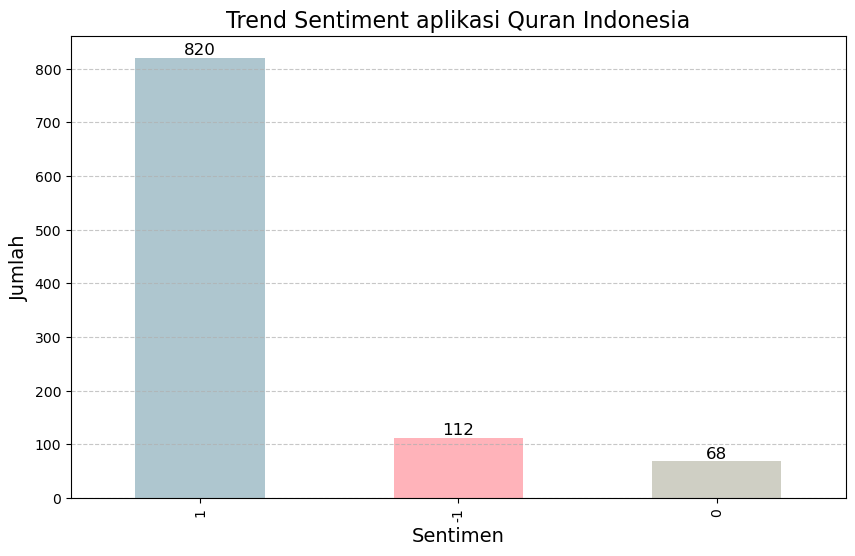

In [5]:
import matplotlib.pyplot as plt

sentimen_data = pd.value_counts(df["Label"], sort=True)

colors = ["#aec6cf", "#ffb3ba", "#cfcfc4"] 

plt.figure(figsize=(10, 6))
sentimen_data.plot(kind='bar', color=colors)

plt.title('Trend Sentiment aplikasi Quran Indonesia', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(sentimen_data):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.show()

Data Cenderung tidak stabil apabila tujuan dari perancangan model Sentiment Analysis ini adalah untuk menentukan klasifikasi sentiment

In [16]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from imblearn.over_sampling import SMOTE  
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorisasi TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['textSteam'])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    df['Label'],
    test_size=0.15,
    random_state=42,
    stratify=df['Label'] 
)

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '-1': {} \n".format(sum(y_train == -1)))

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled == 1)))
print("Before OverSampling, counts of label '-1': {} \n".format(sum(y_train_resampled == -1)))

Before OverSampling, counts of label '0': 58
Before OverSampling, counts of label '1': 697 

Before OverSampling, counts of label '-1': 95 

After OverSampling, the shape of train_X: (1489, 3094)
After OverSampling, the shape of train_y: (1489,) 

After OverSampling, counts of label '0': 697
After OverSampling, counts of label '1': 697
Before OverSampling, counts of label '-1': 95 



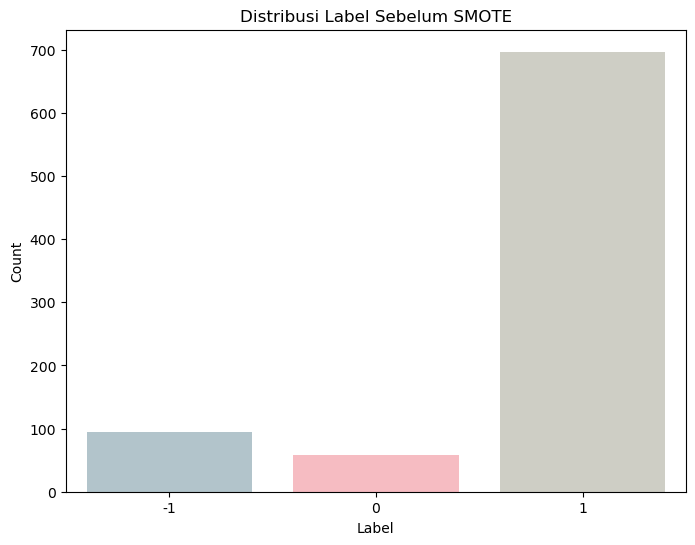

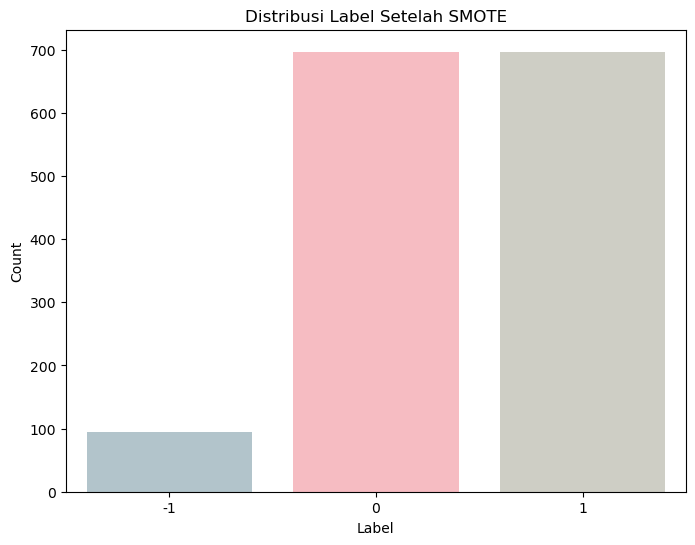

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#aec6cf", "#ffb3ba", "#cfcfc4"]

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette=colors)
plt.title('Distribusi Label Sebelum SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette=colors)
plt.title('Distribusi Label Setelah SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### Modeling

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(850, 3094)
(850,)
(150, 3094)
(150,)


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

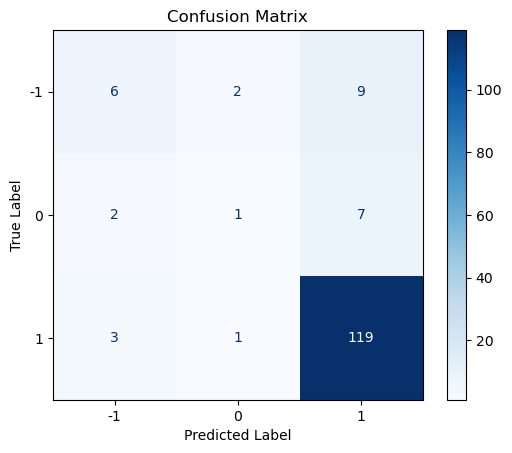

              precision    recall  f1-score   support

          -1       0.55      0.35      0.43        17
           0       0.25      0.10      0.14        10
           1       0.88      0.97      0.92       123

    accuracy                           0.84       150
   macro avg       0.56      0.47      0.50       150
weighted avg       0.80      0.84      0.81       150



In [27]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
cmd.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test, y_pred))

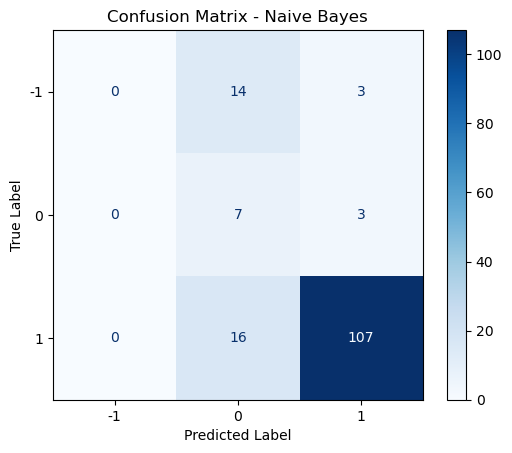

Classification Report - Naive Bayes
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        17
           0       0.19      0.70      0.30        10
           1       0.95      0.87      0.91       123

    accuracy                           0.76       150
   macro avg       0.38      0.52      0.40       150
weighted avg       0.79      0.76      0.76       150



In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

y_pred_nb = nb.predict(X_test)

cm_nb = confusion_matrix(y_test, y_pred_nb)
cmd_nb = ConfusionMatrixDisplay(cm_nb, display_labels=nb.classes_)
cmd_nb.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_pred_nb))

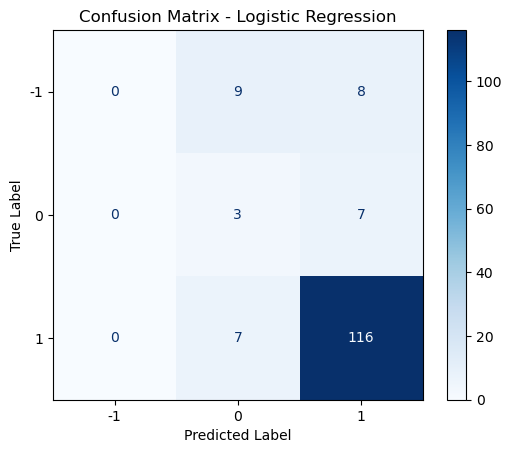

Classification Report - Logistic Regression
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        17
           0       0.16      0.30      0.21        10
           1       0.89      0.94      0.91       123

    accuracy                           0.79       150
   macro avg       0.35      0.41      0.37       150
weighted avg       0.74      0.79      0.76       150



In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cmd_lr = ConfusionMatrixDisplay(cm_lr, display_labels=lr.classes_)
cmd_lr.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))